In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import scipy

In [245]:
n_cells = 1000
dir_name = "../results/piston__1000__100.00__0.01__6.28__1.00__0.50/"
data_dir = dir_name + "/data/"


data = pd.read_csv(data_dir + 'piston_r_u_p.txt', delimiter='\t', names=['r', 'u', 'p', 't'])
data['x'] = data.index
length = int(len(data.index) / n_cells)

In [246]:
data

,r,u,p,t,x
0.000000,1.000000,0.000000,0.600000,0.0002,0.000000
0.001000,1.000000,0.000000,0.600000,0.0002,0.001000
0.002000,1.000000,0.000000,0.600000,0.0002,0.002000
0.003000,1.000000,0.000000,0.600000,0.0002,0.003000
0.004000,1.000000,0.000000,0.600000,0.0002,0.004000
...,...,...,...,...,...
1.157911,0.972905,-0.112550,0.600559,100.0000,1.157911
1.158898,0.972758,-0.112574,0.600434,100.0000,1.158898
1.159886,0.972659,-0.112592,0.600310,100.0000,1.159886
1.160873,0.972537,-0.112604,0.600185,100.0000,1.160873


In [247]:
data[data["x"] == 0.5]

,r,u,p,t,x
0.5,1.000000,0.000000e+00,0.600000,0.000200,0.5
0.5,1.000000,3.854445e-15,0.600000,0.050098,0.5
0.5,1.000000,5.425895e-15,0.600000,0.100184,0.5
0.5,1.000000,1.317556e-14,0.600000,0.150074,0.5
0.5,1.000000,1.689119e-14,0.600000,0.200002,0.5
0.5,1.000000,2.001915e-14,0.600000,0.250016,0.5
0.5,1.000000,2.628557e-14,0.600000,0.300166,0.5
0.5,1.000000,2.781975e-14,0.600000,0.350072,0.5
0.5,1.000000,4.156961e-12,0.600000,0.400136,0.5
0.5,1.000002,1.535065e-06,0.600001,0.450170,0.5


In [248]:
n_steps = int(len(data) / n_cells)
n_steps


2001

In [249]:
p_i= []

for i in range(n_steps):
    x = data.iloc[i*n_cells:(i + 1)*n_cells]["x"]
    p = data.iloc[i*n_cells:(i + 1)*n_cells]["p"]
    p_new = np.interp(0.5, x, p)
    p_i.append(p_new)
#     f = interpolate.interp1d(x, r, fill_value="extrapolate")
#     r_new = f(xi).tolist()
#     ri += r_new

In [250]:
n_steps

2001

In [251]:
t_i = data["t"].unique()

In [252]:
len(p_i)

2001

In [258]:
contact_cell = pd.DataFrame(p_i, columns=["p"])
contact_cell["t"] = t_i

contact_cell = contact_cell.iloc[:len(contact_cell) // 2]

p_mean = contact_cell['p'].mean()
p_mean

contact_cell['p'] -= p_mean
contact_cell['p'].head()

len(contact_cell)

1000

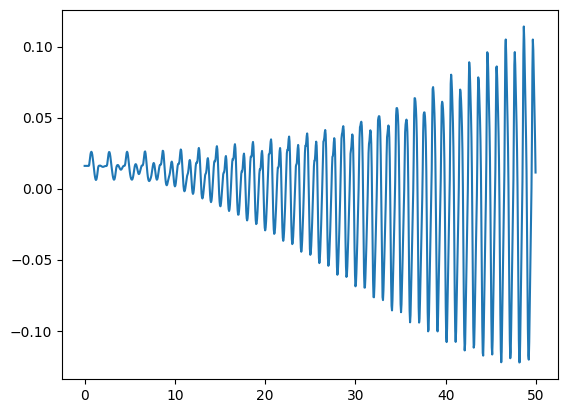

In [259]:
plt.plot(contact_cell.t, contact_cell.p)
plt.show()

0.0002 49.95001


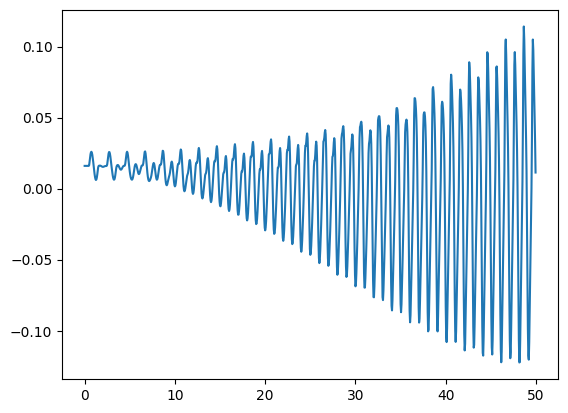

In [260]:
p = contact_cell['p'].iloc[:].to_numpy()

t = contact_cell['t'].iloc[:].to_numpy()

tr = np.linspace(min(t), max(t), len(t))
vr = scipy.signal.resample(p, len(t))

print(min(t),max(t))

t[:10]

tr[:10]

plt.plot(tr, vr)

In [261]:
L = len(tr);

Ts = np.mean(np.diff(tr)); 

Fs = 1/Ts;   

Fn = Fs/2;   

FTvr = fftpack.fft(vr)/L;

Fv = np.linspace(0, 1, L//2 +1) * Fn;

len(FTvr[1:len(Fv)])

500

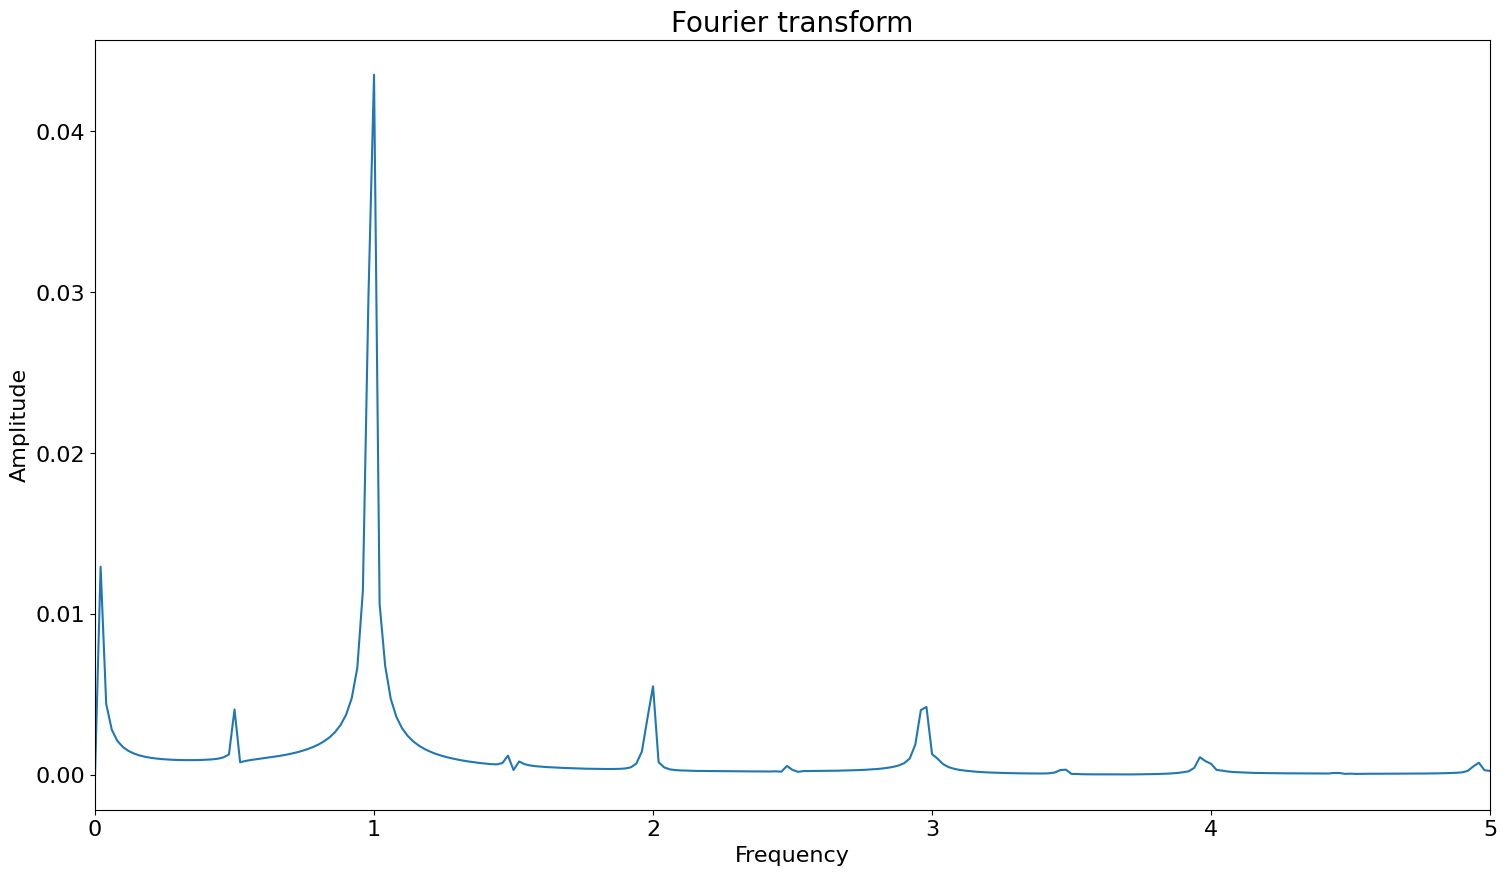

In [262]:
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)
plt.plot(Fv, np.abs(FTvr[0:len(Fv)] * 2))
ax.set_xlabel('Frequency', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 5)
plt.title("Fourier transform", fontsize=20)
plt.show(block=False)
plt.close()

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import scipy

import sys

dir_name = "../results/piston__1000__100.00__0.01__6.28__1.00__0.50/"
data_dir = dir_name + "/data/"


data = pd.read_csv(data_dir + 'cell_params.txt', delimiter='\t', names=['t', 'r', 'u', 'p'], index_col=False)
# data['t'] = data.index
length = int(len(data.index) / n_cells)



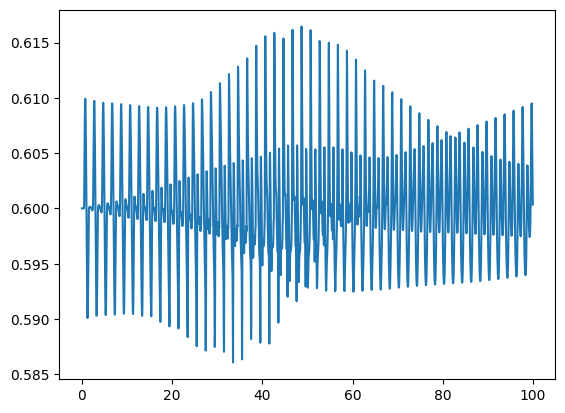

In [227]:
plt.plot(data["t"], data["p"])

In [228]:
data.iloc[80:90]

,t,r,u,p
80,4.000188,1.000098,0.000552,0.600110
81,4.050012,1.000026,-0.010592,0.600039
82,4.100057,0.999943,-0.020986,0.599956
83,4.150085,0.999854,-0.029697,0.599867
84,4.200006,0.999767,-0.035880,0.599781
85,4.250160,0.999690,-0.038827,0.599704
86,4.300089,0.999636,-0.037973,0.599650
87,4.350143,0.999620,-0.033116,0.599634
88,4.400142,0.999704,-0.024499,0.599718
89,4.450062,1.000146,-0.012731,0.600161


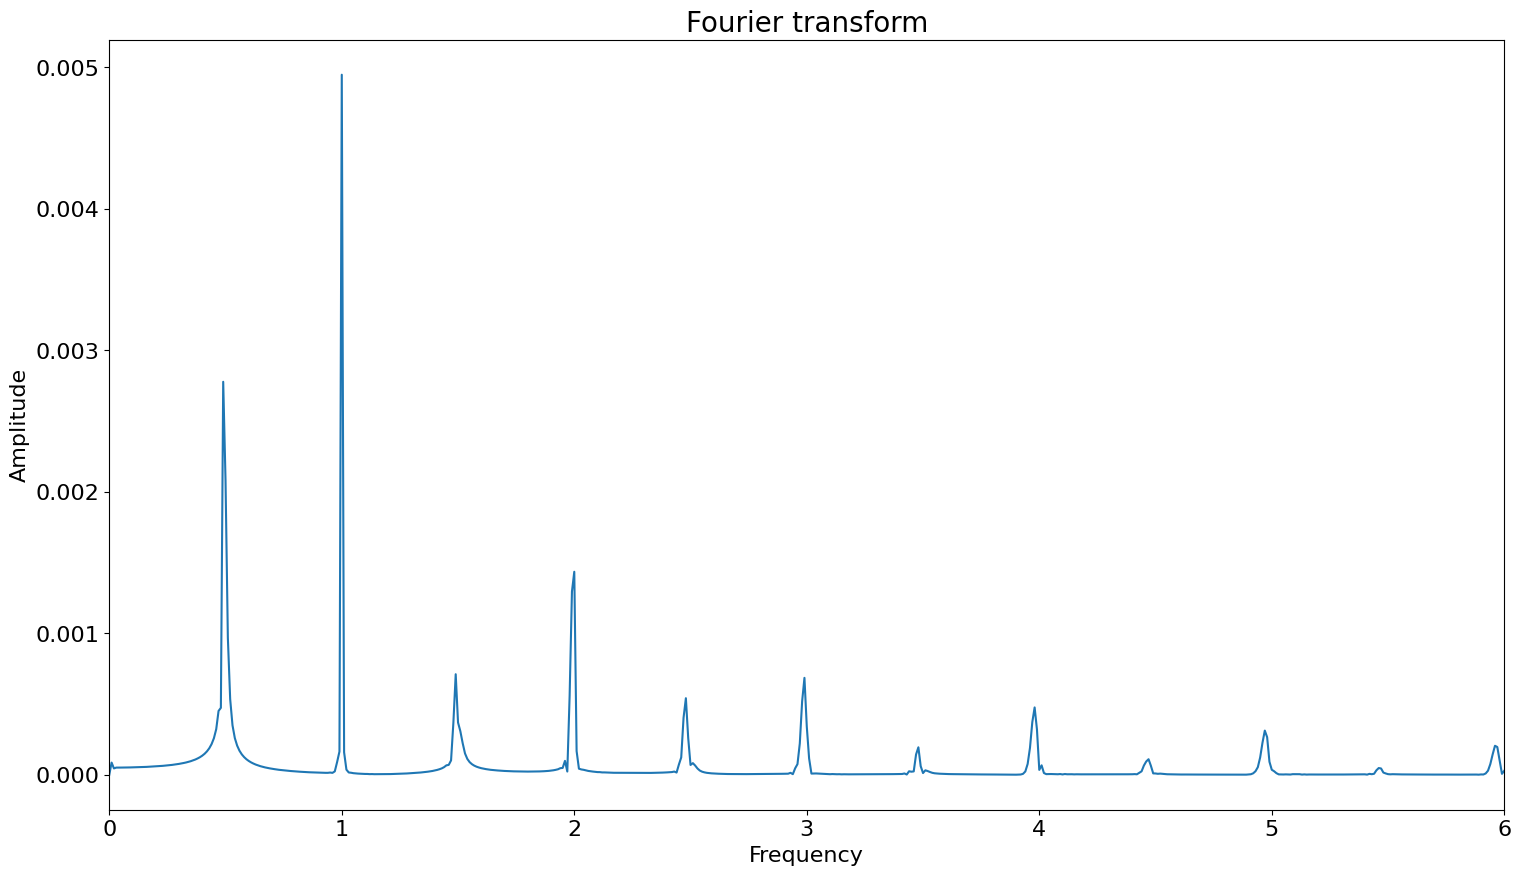

In [229]:
contact_cell = data.copy()

param = 'p'

p_mean = contact_cell[param].mean()
contact_cell[param] -= p_mean

p = contact_cell[param].iloc[:].to_numpy()
t = contact_cell['t'].iloc[:].to_numpy()
tr = np.linspace(min(t), max(t), len(t))
vr = scipy.signal.resample(p, len(t))

L = len(tr)
Ts = np.mean(np.diff(tr))
Fs = 1 / Ts
Fn = Fs / 2
FTvr = fftpack.fft(vr) / L
Fv = np.linspace(0, 1, L // 2 + 1) * Fn

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)
plt.plot(Fv, np.abs(FTvr[0:len(Fv)] * 2))
ax.set_xlabel('Frequency', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 6)
plt.title("Fourier transform", fontsize=20)
plt.show(block=False)
plt.close()

ValueError: x and y must have same first dimension, but have shapes (6000,) and (2,)

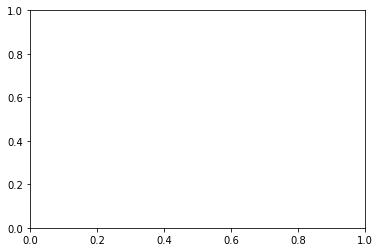

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 6000
# sample spacing
T = 100.0
x = np.linspace(0.0, T, N)
y = np.sin(5.0 * 2.0*np.pi*x) + 0.5*np.sin(8.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(1.0/(T), N/(T), N)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf))
plt.show()